In [1]:
from mylib.EncodeColToBinary import EncodeColToBinary
import numpy as np
import pandas as pd
from pandas import Series

#import Dataset
#dataset = np.loadtxt('..\ks-projects-201801.csv', delimiter=',', skiprows=1)
dataset = pd.read_csv('..\ks-projects-201801.csv', delimiter=',')

In [2]:
#save data in seperate variable
testData = dataset.copy()

In [3]:
#create Time delta : deadline_date - launched_date
timedelta = (pd.to_datetime(testData["deadline"])-pd.to_datetime(testData["launched"]))

testData["timedelta"]= timedelta.dt.days+timedelta.dt.seconds/(24*60*60)

In [4]:
#remove rows that dont contain state of : 'successful' or 'failed'
testData = testData[(testData.state == "successful") | (testData.state == "failed")]

In [5]:
#create column outcome, wich indicate bool of success
testData = testData.assign(outcome=(testData["state"] == "successful").astype(int))


In [6]:
#remove rows where country is 'N,0\"'
testData = testData[(testData.country != "N,0\"")]

In [7]:
testData = EncodeColToBinary(testData,"main_category")
#testData = EncodeColToBinary(testData,"category")
testData = EncodeColToBinary(testData,"country")


In [8]:
#remove irrelevant columns
testData = testData.drop(columns=["usd pledged","goal","pledged","currency","ID","state","name"])

#remove encoded feature
testData = testData.drop(columns=["main_category","category","country"])

#remove datetime
testData = testData.drop(columns=["deadline","launched"])

#reset index
testData = testData.reset_index()
testData = testData.drop(columns=['index'])

In [9]:
testData.describe()

,backers,usd_pledged_real,usd_goal_real,timedelta,outcome,main_category_Publishing,main_category_Film & Video,main_category_Music,main_category_Food,main_category_Crafts,...,country_NZ,country_CH,country_AT,country_BE,country_DK,country_HK,country_NL,country_LU,country_SG,country_JP
count,331465.000000,3.314650e+05,3.314650e+05,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,...,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000
mean,116.455315,9.939901e+03,4.152320e+04,33.390422,0.403816,0.106838,0.170467,0.138177,0.066535,0.023586,...,0.003844,0.001967,0.001463,0.001578,0.002794,0.001439,0.007274,0.000172,0.001370,0.000069
std,965.728598,9.664517e+04,1.109274e+06,12.724162,0.490662,0.308907,0.376044,0.345087,0.249215,0.151756,...,0.061877,0.044308,0.038224,0.039691,0.052781,0.037908,0.084976,0.013112,0.036984,0.008330
min,0.000000,0.000000e+00,1.000000e-02,0.005058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,5.000000e+01,2.000000e+03,29.088912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,7.874600e+02,5.000000e+03,29.656979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,4.609000e+03,1.500000e+04,35.709317,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,219382.000000,2.033899e+07,1.663614e+08,91.962650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
testData.head()

,backers,usd_pledged_real,usd_goal_real,timedelta,outcome,main_category_Publishing,main_category_Film & Video,main_category_Music,main_category_Food,main_category_Crafts,...,country_NZ,country_CH,country_AT,country_BE,country_DK,country_HK,country_NL,country_LU,country_SG,country_JP
0,0,0.0,1533.95,58.491343,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,2421.0,30000.00,59.802813,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,220.0,45000.00,44.985532,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,5000.00,29.858206,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,224,52375.0,50000.00,34.431632,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_data = testData.drop(columns=["backers","usd_pledged_real","outcome"])

Y_data = testData.drop(columns=X_data.columns)

-------------------------------------------------------------------------------------------------------------------------------
ML
--
-------------------------------------------------------------------------------------------------------------------------------

Model and Tuning:

In [12]:
#Global Var
timeScaler=2
finalEst={}

In [13]:
#To select Search method
from mylib.SearchLib import SearchTimeEstimatorFunk, GridSearchFunk, RandomSearcherFunk


def SearcherCat(cat,model,tuning,X,y,scaler,joby,icv,averbose=0,ascoring='f1_micro'):
    m,t = None,None
    if cat == 1:
        t= SearchTimeEstimatorFunk(model,tuning,X,y,scaler,ascoring,job=joby, acv=icv)
    
    elif cat_val == 2:
        m,t,scaler = GridSearchFunk(model,tuning,X,y,ascoring,job=joby,acv=icv,scaler=scaler, averbose=averbose)
        
    elif cat_val == 3:
        m,t= RandomSearcherFunk(model,tuning,X,y,ascoring,job=joby,acv=icv, averbose=averbose)
    
    return m,t,scaler

In [73]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier as MLP_C
from sklearn.neural_network import MLPRegressor as MLP_R
from sklearn.linear_model import SGDClassifier as SGD_C
from sklearn.linear_model import SGDRegressor as SGD_R

#Functions to get Models and Tuning
def GetModelTuning(modelType):
    model=None
    tuning=None
    if modelType=='SGD_C':
        model = Pipeline([( "scaler" , StandardScaler()),#copy=True)),
                  ("SGD",GetSGD_C())])
        tuning = GetSGDTuning()
        
    elif modelType=='SGD_R':
        model = Pipeline([( "scaler" , StandardScaler()),#copy=True)),
                  ("SGD",GetSGD_R())])
        tuning = GetSGDTuning()
    
    elif modelType=='RFC':
        model = GetRFC()
        tuning = GetRFCTuning()
    
    elif modelType=='SVC':
        model = Pipeline([( "scaler" , StandardScaler()),#copy=True)),
                          ("SVC",GetSVC())])
        #model = GetSVC()
        tuning = GetSVCTuning()
    
    elif modelType=='DTC':
        model = GetDTC()
        tuning = GetDTCTuning()
        
    elif modelType=='MLP_C':
        model = model = Pipeline([( "scaler" , StandardScaler()),#copy=True)),
                          ("MLP",GetMLP_C())])
        tuning = GetMLPTuning()
        
    elif modelType=='MLP_R':
        model = model = Pipeline([( "scaler" , StandardScaler()),#copy=True)),
                          ("MLP",GetMLP_R())])
        tuning = GetMLPTuning()
    return model, tuning
        
def GetSGD_C():
    return SGD_C(
        n_jobs=1,
        loss='squared_loss',
        warm_start=True,
        average=False,
        fit_intercept=True,
        penalty = 'l2',
        l1_ratio= 0.3,
        early_stopping=True,
        max_iter=1e5,
        n_iter_no_change = 10,
        tol = 1e-5,
        eta0= 1e-5,
        learning_rate  = "adaptive"
        )

def GetSGD_R():
    return SGD_R(
        alpha = 0.001,
        loss='log',
        warm_start=True,
        average=False,
        fit_intercept=True,
        penalty = 'l1',
        l1_ratio= 0.45,
        early_stopping=True,
        max_iter=1e5,
        n_iter_no_change = 10,
        power_t = 0.65,
        tol = 1e-5,
        eta0= 1e-5,
        random_state=13,
        learning_rate  = "adaptive"
        )

def GetSGDTuning2():
    return {
        'SGD__penalty':("l1","l2"),
        'SGD__alpha': (np.logspace(-3,0,2)),
        'SGD__l1_ratio': (0.2, 0.3,0.4),
        #'SGD__learning_rate':["adaptive"],
        'SGD__tol': np.logspace(-7,-0.5,3),
        #'SGD__eta0': [1e-5]
    }

def GetSGDTuning():
    return {#"SGD__loss":('log', 'modified_huber', 'squared_loss', 'squared_epsilon_insensitive'),
            #"SGD__penalty":("l1","l2","elasticnet"),
            "SGD__alpha":(np.logspace(-5,-3,3)),
            #"SGD__l1_ratio":(np.linspace(0.1,0.9,8)),
            #"SGD__fit_intercept":True,
            "SGD__tol":np.logspace(-10,-0.5,5),
            #"SGD__shuffle":True,
            #"SGD__verbose":0,
            #"SGD__epsilon":0.1,
            "SGD__learning_rate":('optimal','adaptive'),
            #"SGD__eta0":0.0,
            #"SGD__power_t":(np.linspace(0.2,0.8,5)),
            #"SGD__early_stopping":False,
            #"SGD__validation_fraction":0.1,
            #"SGD__n_iter_no_change":5,
            #"SGD__class_weight":None,
            #"SGD__warm_start":False,
            #"SGD__average":False
    }

def GetRFC():
    return RFC(n_estimators=1,
        criterion='entropy', 
        max_depth=None, 
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=0.0001,
        min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=10,
        random_state=None,
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0.0,
        max_samples=None)

def GetRFCTuning():
    return {
        #'n_estimators':[500],
        #'criterion':['entropy'], #'gini',
        'max_depth':[None,1e2,5e2],#,5e2,1e3], 
        #'min_samples_split':2,
        #'min_samples_leaf':[1,3,5,7,9],
        #'min_weight_fraction_leaf':0.0,
        #'max_features':['None'], #,'log2','None'
        #'max_leaf_nodes':None,
        #'min_impurity_decrease':[0.0,1e-10],
        #'min_impurity_split':None,
        #'bootstrap':True,
        #'oob_score':False,
        #'warm_start':[False],
        #'class_weight':None,
        #'ccp_alpha':[0.0,0.5],
        #'max_samples':None
    }

def GetSVC():
    return SVC(C=0.42,
            kernel='poly',
            degree=2,
            gamma='auto', #'auto'
            coef0=1.0,
            shrinking=True,
            probability=False,
            tol=0.0001,
            cache_size=1000,
            class_weight=None,
            verbose=False,
            max_iter=-1,
            decision_function_shape='ovr',
            break_ties=False,
            random_state=None)

def GetSVCTuning():
    return {'SVC__C':np.logspace(-2,0,10),
            #'SVC__kernel':['rbf','sigmoid','poly'],
            #'SVC__degree':np.linspace(1,3,6),
            #'SVC__gamma':np.logspace(-4,-2.5,4),
            #'SVC__coef0':np.logspace(0,0.6,8),
            #'SVC__shrinking':[True],
            #'SVC__probability':[False],
            #'SVC__tol':np.logspace(-4,-1,3),
            #'SVC__class_weight':[None],
            #'SVC__max_iter':[1e3],
            #'SVC__decision_function_shape':['ovr','ovo'],
            #'SVC__break_ties':[False,True],
            #'scaler__with_mean':[True,False]
    }

def GetDTC():
    return DTC(criterion='entropy',
            splitter='best',
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            min_weight_fraction_leaf=0.0,
            max_features='auto',
            random_state=None,
            max_leaf_nodes=[None,1e1,5e1,1e2,2e2],
            min_impurity_decrease=0.0,
            min_impurity_split=None,
            class_weight=None,
            ccp_alpha=0.0,)

def GetDTCTuning():
    return {#'criterion':['entropy','gini'], #'gini',
            #'splitter':['best','random'],
            #'max_depth':None,
            #'min_samples_split':2,
            #'min_samples_leaf':[1,3,5,7,8,9]
            #'min_weight_fraction_leaf':[0.0,1e-8,1e-5,1e-2],
            #'max_features':[None,'sqrt','auto'], #,'None','log2','auto'
            #'random_state':None,
            #'max_leaf_nodes':None,
            #'min_impurity_decrease':[0.0,1e-100,1e-65,1e-50,1e0],
            #'min_impurity_split':None,
            #'class_weight':None,
            #'ccp_alpha':[0.0,1e-8,1e-5,1e-2]
    }

def GetMLP_C():
    return MLP_C(hidden_layer_sizes=100,
               activation='relu',
               solver='adam',
               alpha=0.0001,
               batch_size='auto',
               learning_rate='constant',
               learning_rate_init=0.001,
               power_t=0.5,
               max_iter=200,
               shuffle=True,
               random_state=None,
               tol=0.0001,
               verbose=False,
               warm_start=False,
               momentum=0.9,
               nesterovs_momentum=True,
               early_stopping=False,
               validation_fraction=0.1,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-08,
               n_iter_no_change=10,
               max_fun=15000)

def GetMLP_R():
    return MLP_R(hidden_layer_sizes=100,
               activation='relu',
               solver='adam',
               alpha=0.0001,
               batch_size='auto',
               learning_rate='constant',
               learning_rate_init=0.001,
               power_t=0.5,
               max_iter=200,
               shuffle=True,
               random_state=None,
               tol=0.0001,
               verbose=False,
               warm_start=False,
               momentum=0.9,
               nesterovs_momentum=True,
               early_stopping=False,
               validation_fraction=0.1,
               beta_1=0.9,
               beta_2=0.999,
               epsilon=1e-08,
               n_iter_no_change=10,
               max_fun=15000)

def GetMLPTuning():
    return {'MLP__hidden_layer_sizes':[100],
            'MLP__activation':['relu'],
            'MLP__solver':['adam'],
            'MLP__alpha':[0.0001],
            'MLP__batch_size':['auto'],
            'MLP__learning_rate':['constant'],
            'MLP__learning_rate_init':[0.01],
            'MLP__power_t':[0.5],
            'MLP__max_iter':[1000],
            'MLP__shuffle':[True],
            'MLP__random_state':[None],
            'MLP__tol':[0.0001],
            'MLP__verbose':[False],
            'MLP__warm_start':[False],
            'MLP__momentum':[0.9],
            'MLP__nesterovs_momentum':[True],
            'MLP__early_stopping':[False],
            'MLP__validation_fraction':[0.1],
            'MLP__beta_1':[0.9],
            'MLP__beta_2':[0.999],
            'MLP__epsilon':[1e-08],
            'MLP__n_iter_no_change':[10],
            'MLP__max_fun':[15000]}
    
    

In [15]:
from mylib.DivisionOfDataset import DivisonOfDataset as DoD

#TODO : Divide dataset with outcome same ration in each slice
##X_suc = Data[outcome==1]
##X_fail = Data[outcome==0]
def DivideData(x,y,trainSizeProcent):
    X_train,X_test = DoD(x,trainSizeProcent)
    Y_train,Y_test = DoD(y,trainSizeProcent)
    return X_train,X_test,Y_train,Y_test

In [16]:
from sklearn.decomposition import PCA

def DimensionsReduction(x,dim):
    pca = PCA(n_components=dim)
    res = pca.fit_transform(x)
    return pd.DataFrame(res)

In [17]:
#Finde Model for Succes
from mylib.BestModelTool import HandleNewBest
icv =10
joby =9
verb = 1
trainSizeProcent = 70
redDim = False
dim = 10
scoreType = 'f1_micro' #'f1_micro', 'neg_mean_squared_error','r2'
targetCol = "outcome" #'outcome','usd_pledged_real'

modelType = "SGD_C" #'DTC',"SVC","MLP-C","MLP_R","SGD_C","SGD_R"

if redDim: X_newData = DimensionsReduction(X_data,dim) 
else: X_newData  = X_data

X_train,X_test,Y_train,Y_test = DivideData(X_newData,Y_data,trainSizeProcent)



cat_val = 2 #1:estimate time | 2:GridSearch | 3:RandomSearch

# Setup model and search parameters
model,tuning_parameters = GetModelTuning(modelType)

bestmodel , t , timeScaler= SearcherCat(cat_val,model,tuning_parameters,X_train,Y_train[targetCol],timeScaler,joby, icv, averbose=verb,ascoring=scoreType)

print(f"current TimeScaler:{timeScaler}")
print()

HandleNewBest(bestmodel,X_test,Y_test[targetCol],t,finalEst,report=True, writeFile=True, modelType=modelType)

Combination count: 30
Datasize: 232026, feature: 39

Start at: 13:59:9  16/5/2021

One iteration took: 10.47 secounds
Estimated time: 0:10:27
Expected done at : 14:9:47 16/5/2021
Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=9)]: Using backend LokyBackend with 9 concurrent workers.
[Parallel(n_jobs=9)]: Done  32 tasks      | elapsed:   14.3s
[Parallel(n_jobs=9)]: Done 182 tasks      | elapsed:  1.6min
[Parallel(n_jobs=9)]: Done 300 out of 300 | elapsed:  2.6min finished


ended at: 14:2:2  16/5/2021
current TimeScaler:1.7036986640976157

New Model score: 0.6337824118191411
New model saved

SGD_C : 0.6337824118191411

SEARCH TIME: 162.79 sec

Best model set found on train set:

	best parameters={'SGD__alpha': 1e-05, 'SGD__learning_rate': 'adaptive', 'SGD__tol': 5.623413251903491e-06}
	best 'f1_micro' score=0.6337824118191411
	best index=7

Best estimator CTOR:
	Pipeline(steps=[('scaler', StandardScaler()),
                ('SGD',
                 SGDClassifier(alpha=1e-05, early_stopping=True, eta0=1e-05,
                               l1_ratio=0.3, learning_rate='adaptive',
                               loss='squared_loss', max_iter=100000.0,
                               n_iter_no_change=10, n_jobs=1,
                               tol=5.623413251903491e-06, warm_start=True))])

Grid scores ('f1_micro') on development set:
	[ 0]: 0.503 (+/-0.053) for {'SGD__alpha': 1e-05, 'SGD__learning_rate': 'optimal', 'SGD__tol': 1e-10}
	[ 1]: 0.503 (+/-0.069) for

C:\Users\Micha\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=None as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


("best: score=0.63378, model=Pipeline(SGD__alpha=1e-05,SGD__learning_rate='adaptive',SGD__tol=5.623413251903491e-06)",
 Pipeline(steps=[('scaler', StandardScaler()),
                 ('SGD',
                  SGDClassifier(alpha=1e-05, early_stopping=True, eta0=1e-05,
                                l1_ratio=0.3, learning_rate='adaptive',
                                loss='squared_loss', max_iter=100000.0,
                                n_iter_no_change=10, n_jobs=1,
                                tol=5.623413251903491e-06, warm_start=True))]))

## Confusion_matrix

In [40]:
from sklearn.metrics import confusion_matrix
y_pred = bestmodel.predict(X_test)
conf = confusion_matrix(Y_test[targetCol],y_pred)
#y_pred = bestmodel.predict(X_train)
#conf = confusion_matrix(Y_train[targetCol],y_pred)
tn = conf[0][0]
fn = conf[1][0]
fp = conf[0][1]
tp = conf[1][1]
conf
fromnr  = 0
count = 35

print(f"predict:\t{bestmodel.predict(X_test[fromnr:fromnr+count])}")
print(f"true: \t\t{np.array(Y_test[targetCol][fromnr:fromnr+count])}")
print()
print(conf)


predict:	[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
true: 		[0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0]

[[51200  8319]
 [27894 12026]]


In [44]:
#testData = testData.assign(outcome=(testData["state"] == "successful").astype(int))
#testData = testData[(testData.country != "N,0\"")]
one_count = len(Y_test[Y_test.outcome==1])
zero_count = len(Y_test[Y_test.outcome==0])

print(one_count)
print(zero_count)

print(one_count/(one_count+zero_count))
print(zero_count/(one_count+zero_count))

39920
59519
0.4014521465421012
0.5985478534578988


In [48]:
def GetRecall(t, nf):
    return t/(t+nf)

def GetPrecision(t,f):
    return t/(t+f)

def GetF1(pv, tr):
    return 2*(pv*tr)/(pv+tr)

def GetAcc(tn,fn,tp,fp):
    return (tp+tn)/(tn+fn+tp+fp)



tpr = GetRecall(tp,fn)
ppv = GetPrecision(tp,fp)
p_f1 = GetF1(ppv,tpr)

tnr = GetRecall(tn,fp)
npv = GetPrecision(tn,fn)
n_f1 = GetF1(pnv,tnr)


print(f"tn: {tn}")
print(f"fn: {fn}")
print(f"fp: {fp}")
print(f"tp: {tp}")
print()
print(f"TPR: {tpr}")
print(f"PPV: {ppv}")
print(f"p_f1: {p_f1}")
print()
print(f"TNR: {tnr}")
print(f"NPV: {pnv}")
print(f"n_f1: {n_f1}")

print()
print(f"acc: {GetAcc(tn,fn,tp,fp)}")


tn: 51200
fn: 27894
fp: 8319
tp: 12026

TPR: 0.30125250501002004
PPV: 0.591103465224871
p_f1: 0.3991039575209491

TNR: 0.8602295065441288
NPV: 0.6473310238450452
n_f1: 0.7387474479305692

acc: 0.6358269894105935


## PCA - analyse 

In [21]:
aDim = 10
pca = PCA(n_components=aDim)
X_red = pca.fit_transform(X_data)
X_rec = pca.inverse_transform(X_red)

In [22]:
X_data

,usd_goal_real,timedelta,main_category_Publishing,main_category_Film & Video,main_category_Music,main_category_Food,main_category_Crafts,main_category_Games,main_category_Design,main_category_Comics,...,country_NZ,country_CH,country_AT,country_BE,country_DK,country_HK,country_NL,country_LU,country_SG,country_JP
0,1533.95,58.491343,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.00,59.802813,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,45000.00,44.985532,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5000.00,29.858206,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50000.00,34.431632,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331460,6500.00,29.077523,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331461,1500.00,26.850532,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331462,15000.00,45.180208,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331463,15000.00,30.240359,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
X_rec = pd.DataFrame(X_rec)
X_rec

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,1533.95,58.491118,0.999984,0.013396,0.007488,-0.020298,0.011453,-0.021614,-0.040012,0.012689,...,0.015592,0.007120,0.005711,0.006349,0.010475,0.004338,0.026656,0.000874,0.004784,0.000180
1,30000.00,59.802816,-0.004620,0.996031,-0.004190,-0.007194,0.001342,-0.005163,-0.005631,0.013815,...,-0.000660,-0.000058,0.000148,0.000073,-0.000347,-0.000644,-0.002222,-0.000006,-0.000839,-0.000091
2,45000.00,44.985545,-0.005747,0.994913,-0.005295,-0.010316,0.006196,-0.006122,-0.006669,0.013426,...,-0.000034,-0.000376,-0.000046,-0.000197,-0.000268,-0.000756,-0.002206,-0.000048,-0.000726,-0.000065
3,5000.00,29.858228,-0.008755,-0.007414,0.992084,-0.018831,0.014435,-0.009860,-0.011401,0.016088,...,0.000022,-0.000161,-0.000097,0.000136,0.000511,-0.000742,-0.000390,0.000013,-0.000462,-0.000004
4,50000.00,34.431787,-0.044015,-0.033383,-0.037696,0.844035,0.043879,-0.055098,-0.073544,0.061992,...,0.000744,0.000202,0.000386,0.000234,-0.000080,-0.001105,0.001047,0.000101,0.000512,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331460,6500.00,29.077682,-0.044436,-0.033798,-0.038107,0.842872,0.045658,-0.055459,-0.073938,0.061876,...,0.000974,0.000068,0.000316,0.000137,-0.000049,-0.001144,0.001048,0.000085,0.000555,0.000016
331461,1500.00,26.850557,-0.007143,0.993531,-0.006663,-0.014183,0.012170,-0.007314,-0.007962,0.012981,...,0.000736,-0.000790,-0.000283,-0.000527,-0.000168,-0.000892,-0.002192,-0.000100,-0.000586,-0.000033
331462,15000.00,45.180221,-0.005740,0.994921,-0.005288,-0.010297,0.006148,-0.006118,-0.006666,0.013446,...,-0.000040,-0.000384,-0.000043,-0.000193,-0.000267,-0.000754,-0.002209,-0.000048,-0.000727,-0.000065
331463,15000.00,30.240319,-0.015242,-0.007828,-0.010969,-0.044947,0.028744,-0.025642,-0.035846,0.037647,...,0.004649,0.004734,0.002877,0.002034,0.004173,0.003339,0.015376,0.000198,0.001715,0.000123


In [24]:
X_pca = PCA(n_components=10)
X_pca.fit(X_data)
# varianser og standard afvigelser (længde af akser)
varians1 = X_pca.explained_variance_
s1 = np.sqrt(varians1)

print(varians1)
print()
print(s1)

X_data.describe()

[1.23048822e+12 1.61830323e+02 2.14458626e-01 1.59147355e-01
 1.24113659e-01 9.94203551e-02 8.42746104e-02 7.96870369e-02
 7.69333744e-02 6.88469494e-02]

[1.10927373e+06 1.27212548e+01 4.63096779e-01 3.98932770e-01
 3.52297686e-01 3.15309935e-01 2.90300896e-01 2.82288925e-01
 2.77368662e-01 2.62387022e-01]


,usd_goal_real,timedelta,main_category_Publishing,main_category_Film & Video,main_category_Music,main_category_Food,main_category_Crafts,main_category_Games,main_category_Design,main_category_Comics,...,country_NZ,country_CH,country_AT,country_BE,country_DK,country_HK,country_NL,country_LU,country_SG,country_JP
count,3.314650e+05,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,...,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000,331465.000000
mean,4.152320e+04,33.390422,0.106838,0.170467,0.138177,0.066535,0.023586,0.086045,0.076518,0.029801,...,0.003844,0.001967,0.001463,0.001578,0.002794,0.001439,0.007274,0.000172,0.001370,0.000069
std,1.109274e+06,12.724162,0.308907,0.376044,0.345087,0.249215,0.151756,0.280431,0.265825,0.170038,...,0.061877,0.044308,0.038224,0.039691,0.052781,0.037908,0.084976,0.013112,0.036984,0.008330
min,1.000000e-02,0.005058,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000e+03,29.088912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+03,29.656979,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.500000e+04,35.709317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.663614e+08,91.962650,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Training...n_epochs= 100
  epoch=   0, f1_train=0.59, f1_test=0.60
  epoch=   1, f1_train=0.59, f1_test=0.60
  epoch=   2, f1_train=0.59, f1_test=0.60
  epoch=   3, f1_train=0.59, f1_test=0.60
  epoch=   4, f1_train=0.59, f1_test=0.60
  epoch=   5, f1_train=0.59, f1_test=0.60
  epoch=   6, f1_train=0.59, f1_test=0.60
  epoch=   7, f1_train=0.59, f1_test=0.60
  epoch=   8, f1_train=0.59, f1_test=0.60
  epoch=   9, f1_train=0.59, f1_test=0.60
  epoch=  10, f1_train=0.59, f1_test=0.60
  epoch=  11, f1_train=0.59, f1_test=0.60
  epoch=  12, f1_train=0.59, f1_test=0.60
  epoch=  13, f1_train=0.59, f1_test=0.60
  epoch=  14, f1_train=0.59, f1_test=0.60
  epoch=  15, f1_train=0.59, f1_test=0.60
  epoch=  16, f1_train=0.59, f1_test=0.60
  epoch=  17, f1_train=0.59, f1_test=0.60
  epoch=  18, f1_train=0.59, f1_test=0.60
  epoch=  19, f1_train=0.59, f1_test=0.60
  epoch=  20, f1_train=0.59, f1_test=0.60
  epoch=  21, f1_train=0.60, f1_test=0.60
  epoch=  22, f1_train=0.60, f1_test=0.60
  epoch= 

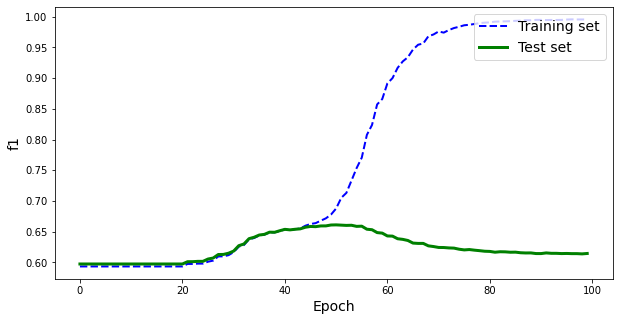

In [123]:
from sklearn.metrics import f1_score as f1
import matplotlib.pyplot as plt

def rfc_fitting(minImp) :
    return RFC(n_estimators=35,
        criterion='entropy', 
        max_depth=None, 
        min_samples_split=2,
        min_samples_leaf=1,
        min_weight_fraction_leaf=0.0,
        max_features='auto',
        max_leaf_nodes=None,
        min_impurity_decrease=minImp,
        min_impurity_split=None,
        bootstrap=True,
        oob_score=False,
        n_jobs=10,
        random_state=42,
        verbose=0,
        warm_start=False,
        class_weight=None,
        ccp_alpha=0.0,
        max_samples=None)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    minImpArr = np.logspace(-1,-8,n_epochs)
    
    for epoch in range(n_epochs):
        rfc = None
        rfc = rfc_fitting(minImpArr[epoch])
        rfc.fit(X_train, y_train)
        
        y_train_predict = rfc.predict(X_train)
        y_val_predict   = rfc.predict(X_val)
        
        f1_train=f1(y_train, y_train_predict, average='micro')#, squared=False)
        f1_val  =f1(y_val  , y_val_predict,average='micro')#, squared=False)

        train_errors.append(f1_train)
        val_errors  .append(f1_val)
        if verbose:
            print(f"  epoch={epoch:4d}, f1_train={f1_train:4.2f}, f1_test={f1_val:4.2f}")

    return train_errors, val_errors
    
X_train_fitting,X_test_fitting,Y_train_fitting,Y_test_fitting = DivideData(X_data,Y_data,30)

n_epochs = 100
train_errors, val_errors = Train(X_train_fitting, Y_train_fitting['outcome'], X_test_fitting, Y_test_fitting['outcome'], n_epochs, True)


plt.figure(figsize=(10,5))

plt.plot(train_errors, "b--", linewidth=2, label="Training set")
plt.plot(val_errors, "g-", linewidth=3, label="Test set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("f1", fontsize=14)
plt.show()